In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir IS
!ls -a
!cp -r '/content/drive/MyDrive/IS/data-final.csv.zip' -d "/content/IS/data-final.csv.zip"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
.  ..  .config	drive  .ipynb_checkpoints  IS  sample_data


In [ ]:
!unzip '/content/IS/data-final.csv.zip' -d '/content/IS/'

Archive:  /content/IS/data-final.csv.zip
  inflating: /content/IS/data-final.csv  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_raw = pd.read_csv('/content/IS/data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
print('Found any missing value? ', data.isnull().values.any())
print('Count of missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Found any missing value?  True
Count of missing values?  89227
Number of participants after eliminating missing values:  1013481


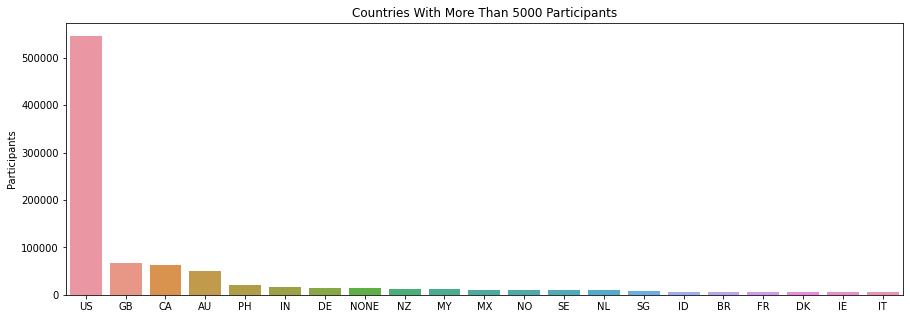

In [ ]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [ ]:
  # Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [ ]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=10, color= color, alpha=.6)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


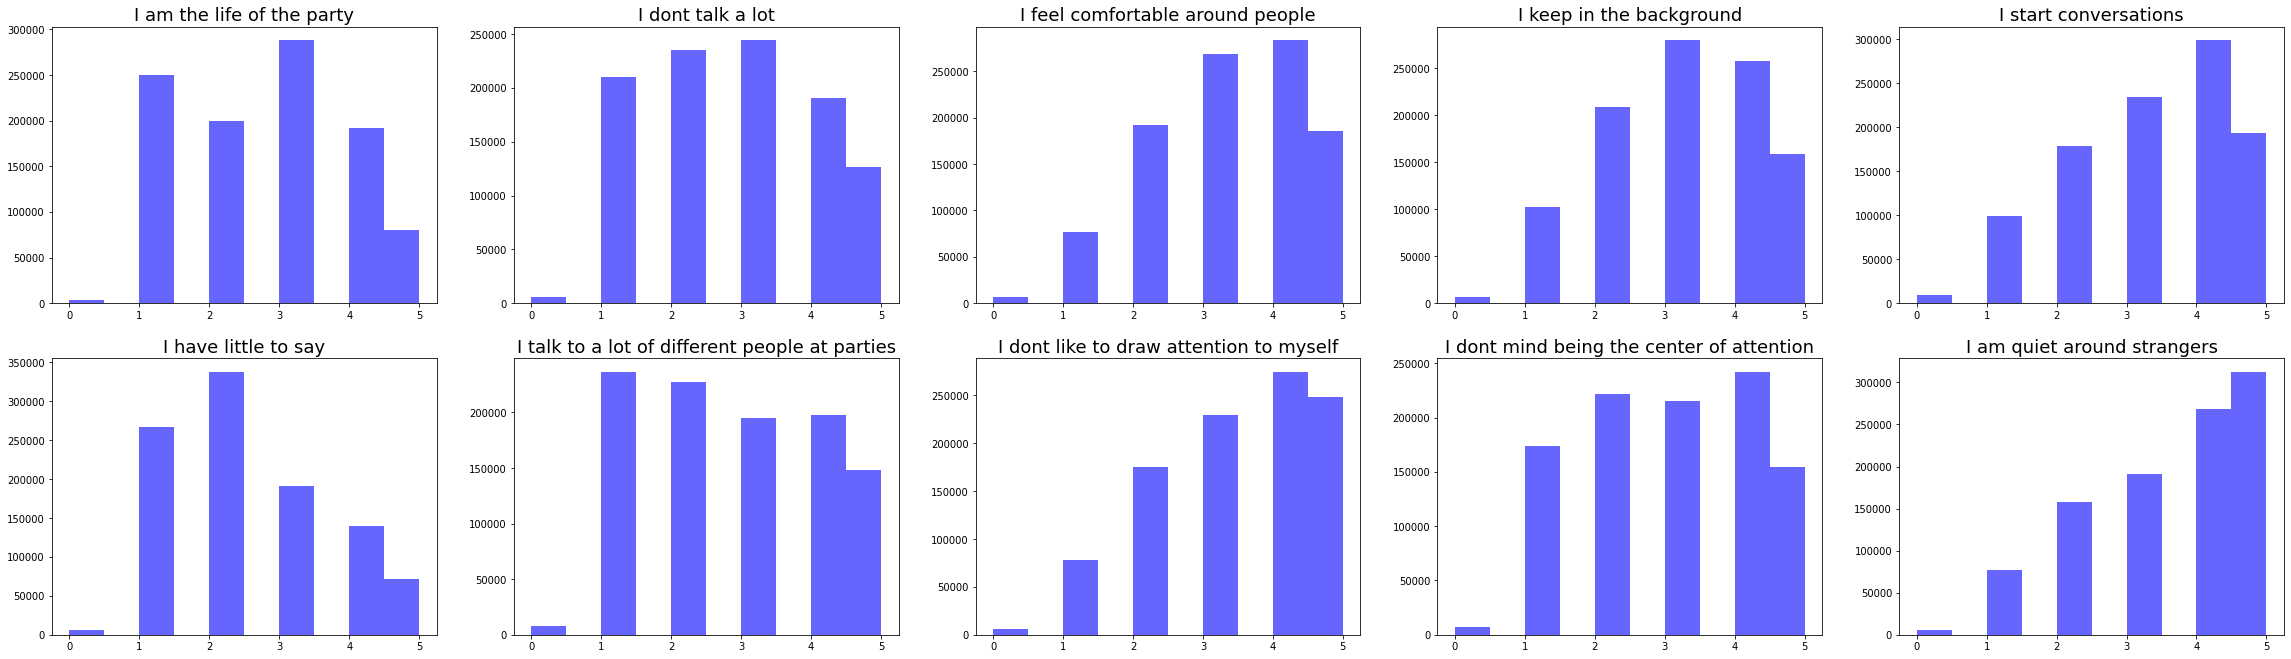

In [ ]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'blue')

Q&As Related to Neuroticism Personality


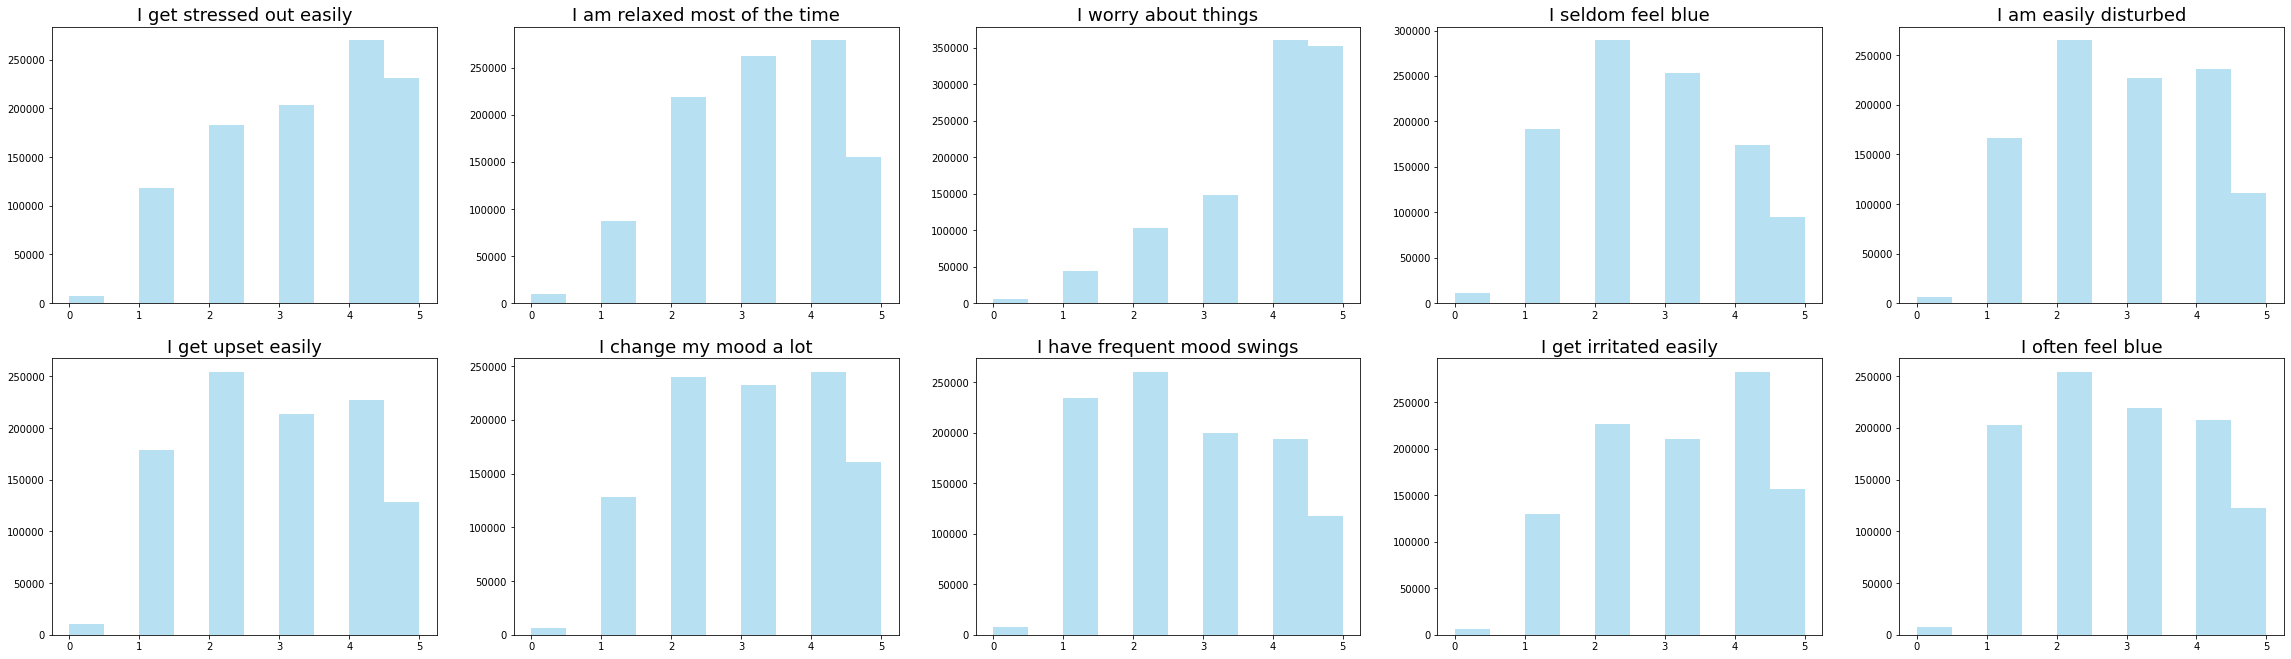

In [ ]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'skyblue')

Q&As Related to Agreeable Personality


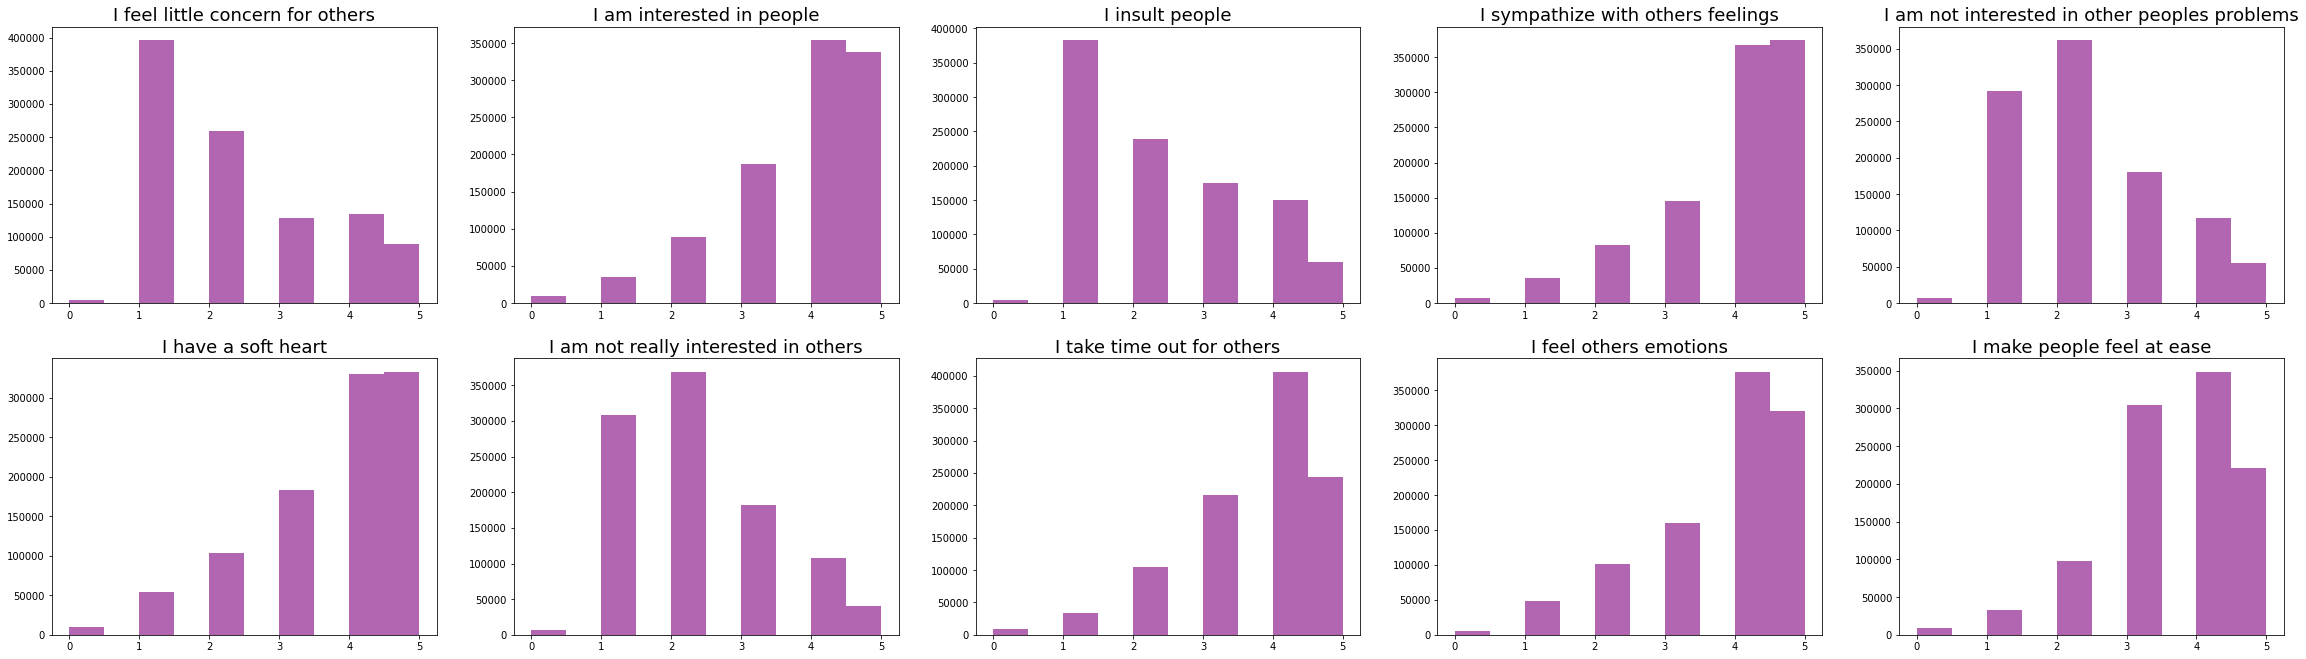

In [ ]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'purple')

Q&As Related to Conscientious Personality


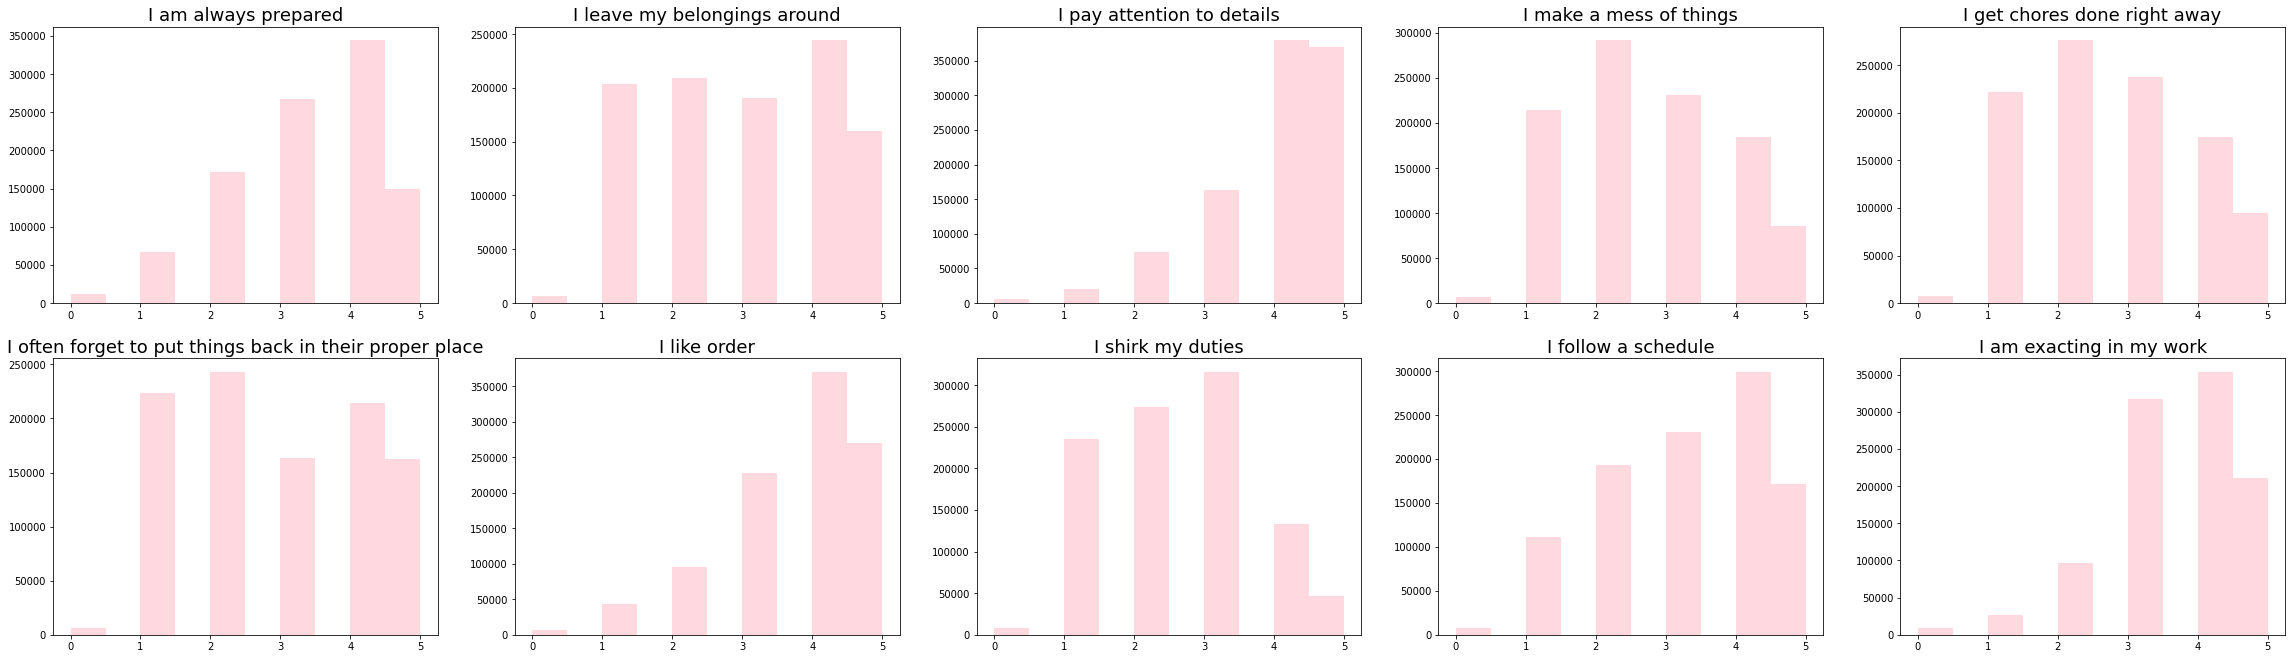

In [ ]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'pink')

Q&As Related to Open Personality


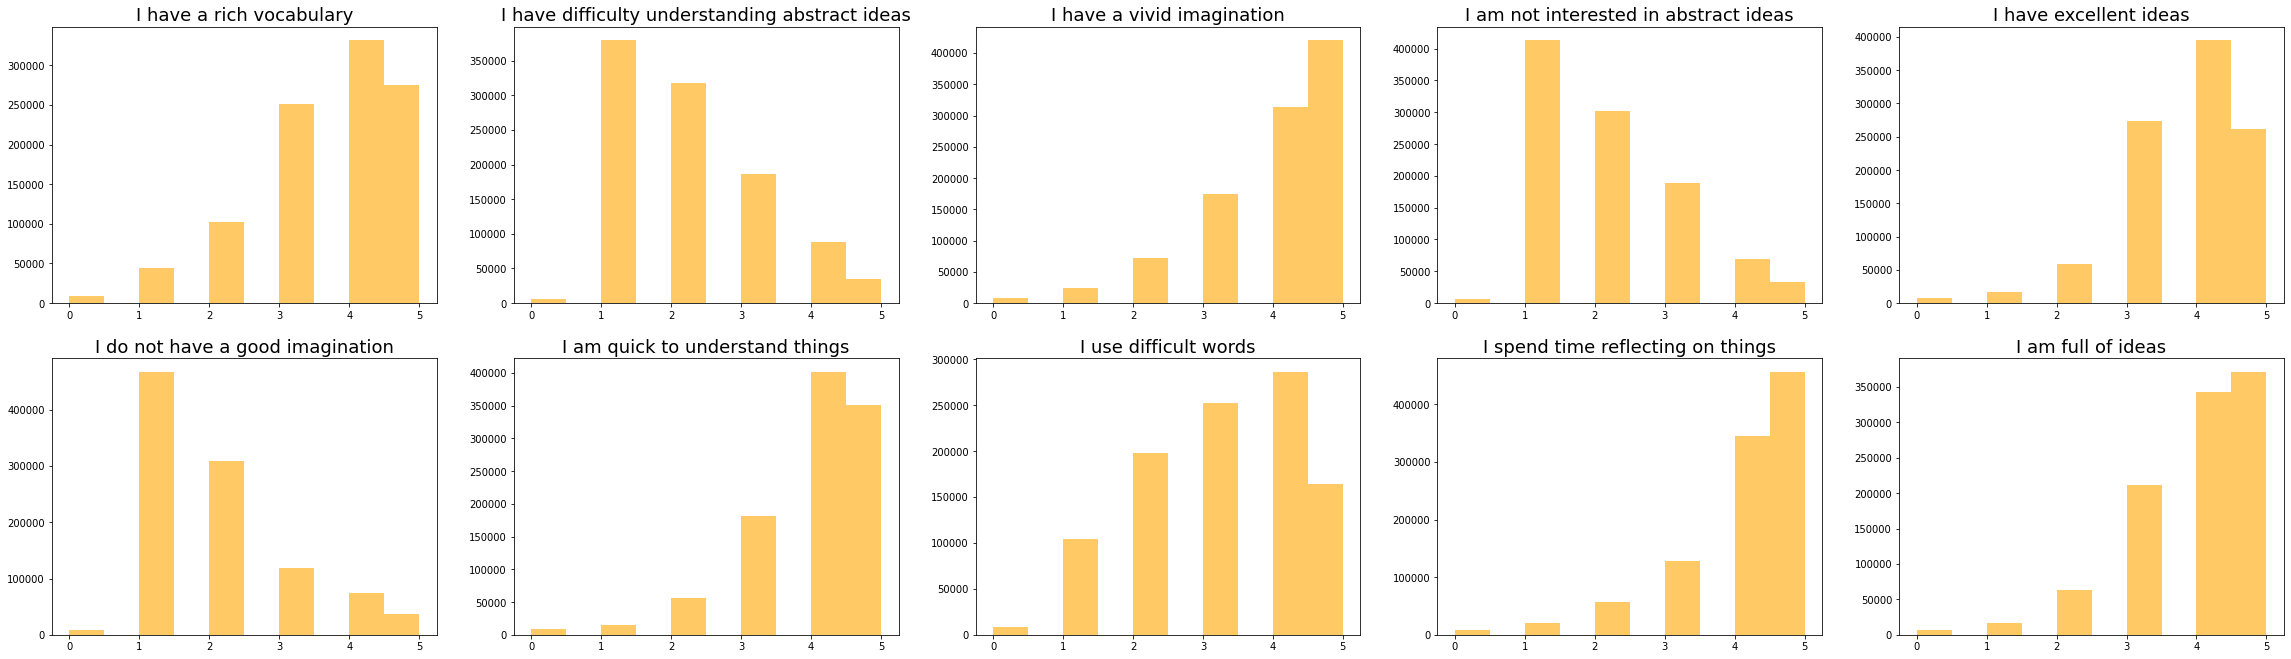

In [ ]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'orange')

**Scaleing all the values**

In [ ]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

*Visualize the elbow*

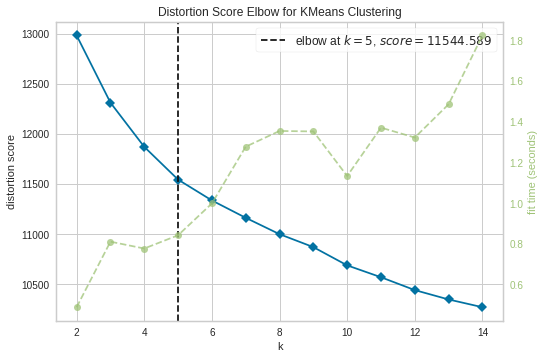

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

**As we can see 5 clusters looks optimum for the data set and we already know this research is to identify 5 different personalities.**

## Clustering into 5 Personality Groups

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# We use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# We define 5 clusters and fit the model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,4
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,2
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,4


## Analysing the Model and Predictions

Checking How many individual do we have for each cluster?

In [ ]:
df_model.Clusters.value_counts()

1    226104
0    212647
4    209770
3    200299
2    164661
Name: Clusters, dtype: int64

Grouping the results acording to clusters.

So that we can investigate the average answer to the each question for each cluster.

and also we can have an intuition about how our model classifies people.

In [ ]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.132577,3.295476,3.101205,3.654992,2.968478,2.699069,2.215592,3.996280,2.332631,4.127493,3.504211,3.079959,4.154336,2.608299,2.821319,2.789811,2.870772,2.431899,2.973708,2.706631,1.884141,3.942228,1.691174,4.354715,1.983564,4.146736,2.010623,3.985262,4.177708,3.724638,3.836678,2.229079,4.300202,2.019436,3.241569,2.075176,4.165481,2.016422,3.834576,3.892282,3.575926,2.136752,3.896321,2.062230,3.730521,1.964646,4.011347,2.985624,4.265797,3.818046
1,3.447445,1.917967,3.787354,2.510062,4.036647,1.835160,3.647928,2.769849,3.762308,3.005882,3.810198,2.927533,4.242296,2.412708,3.287284,3.467652,3.808234,3.458917,3.657799,3.177011,2.163164,4.269027,2.660254,4.179183,2.005356,3.994741,1.862187,3.893660,4.127357,3.841427,2.951257,3.611475,3.838110,3.242871,2.229576,3.530380,3.454477,2.833156,2.940156,3.476015,3.738134,2.118410,4.247452,1.967170,3.955905,1.772777,3.960602,3.375332,4.188205,4.200076
2,2.185156,3.291131,2.792501,3.407522,2.583283,2.765099,2.116208,3.529646,2.644506,3.790466,2.341660,3.622357,2.989554,2.921372,2.320981,2.010069,2.298395,1.919052,2.577490,2.242583,3.023855,2.930931,2.570524,2.775381,3.148596,2.649996,3.000790,2.851647,2.604047,2.978143,3.143871,2.829711,3.667353,2.407285,2.369948,2.740297,3.377715,2.511542,2.770784,3.339285,3.534662,1.976734,3.613637,2.057980,3.621471,2.042991,3.884909,3.108860,3.698350,3.666157
3,1.806504,3.631111,2.229737,4.056256,2.280615,3.196786,1.740713,4.070280,2.173790,4.475374,4.248049,2.460457,4.502374,2.145767,3.556358,3.856515,3.986770,3.756888,4.004433,3.930030,2.499633,3.329642,2.602864,3.803768,2.586688,3.822091,2.743683,3.407146,3.644671,3.044813,2.808097,3.352248,3.813279,3.473038,2.094833,3.496108,3.562095,3.042262,2.779599,3.309083,3.500132,2.382633,4.061109,2.138268,3.432548,2.088238,3.678186,3.177335,4.275763,3.721007
4,3.476088,1.939367,4.340378,2.214778,4.266783,1.663479,3.890218,2.804452,3.747705,2.509911,2.322310,3.821223,3.154021,3.282967,2.115112,1.900691,2.111822,1.677757,2.117672,1.718706,1.894365,4.431964,1.833851,4.245717,1.857611,3.845159,1.587982,4.096453,4.098808,4.194661,3.714421,2.582943,4.190137,1.899614,3.136659,2.283429,3.868647,1.936573,3.578596,3.874296,3.886075,1.753544,4.083582,1.794270,4.159017,1.653635,4.314444,3.236707,4.095333,4.296434


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

---



In [ ]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.052379,2.994094,3.190079,3.161090,3.244721
1,3.072060,3.424963,3.299636,3.210747,3.352406
2,2.910552,2.524351,2.853391,2.915779,3.120575
3,2.966117,3.644764,3.148500,3.173064,3.245522
4,3.085316,2.422228,3.208657,3.106531,3.327304


## Visualizing the means for each cluster


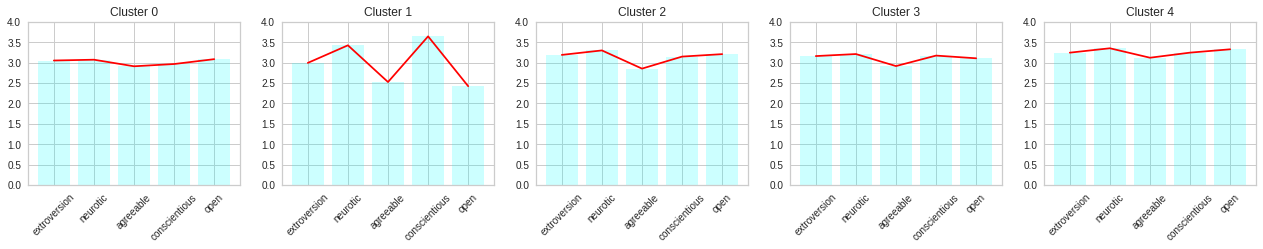

In [ ]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='cyan', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

## Visualizing the Cluster **Predictions**

In [ ]:
# In order to visualize in 2D graph We use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.656793,-1.419176,4
1,0.492955,2.896935,0
2,-0.397245,2.019591,0
3,1.088029,0.300372,2
4,-4.845852,2.429824,4


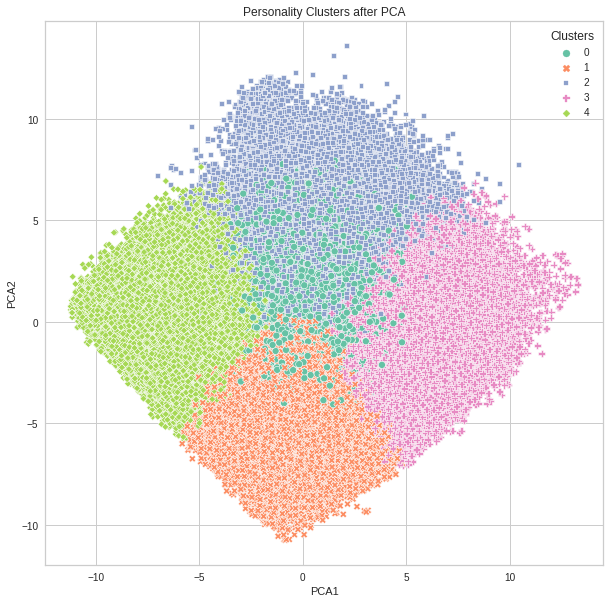

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2',
                hue='Clusters', palette='Set2', alpha=1,hue_norm='1',
                style="Clusters")
plt.title('Personality Clusters after PCA');

## Implementing the Model to See User Input Personality

We answered the questions in an Microsoft Excel spread sheet.
Then added that data into this notebook and put our answers to the model to see in which category User will be.

In [ ]:
input_data = pd.read_excel('sample_input.xlsx')
input_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5


In [ ]:
input_personality = k_fit.predict(input_data)
print('Input Personality Cluster: ', input_personality)

Input Personality Cluster:  [4]


In [ ]:
# Summing up the our question groups
col_list = list(input_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

our_sums = pd.DataFrame()

our_sums['extroversion'] = input_data[ext].sum(axis=1)/10
our_sums['neurotic'] = input_data[est].sum(axis=1)/10
our_sums['agreeable'] = input_data[agr].sum(axis=1)/10
our_sums['conscientious'] = input_data[csn].sum(axis=1)/10
our_sums['open'] = input_data[opn].sum(axis=1)/10

our_sums['cluster'] = input_personality

print('Sum of our question groups')
our_sums

Sum of our question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.0,2.4,3.1,3.2,3.3,4


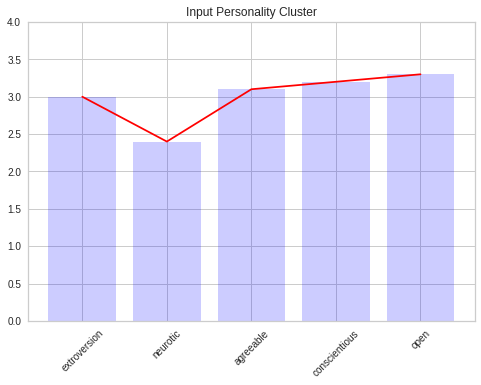

In [ ]:
our_sums = our_sums.drop('cluster', axis=1)
plt.bar(our_sums.columns, our_sums.iloc[0,:], color='blue', alpha=0.2)
plt.plot(our_sums.columns, our_sums.iloc[0,:], color='red')
plt.title('Input Personality Cluster')
plt.xticks(rotation=45)
plt.ylim(0,4);